# Defense Method Comparison

This notebook illustrates the defense comparison with different approaches, as presented in our [poster](https://nips.cc/media/PosterPDFs/NeurIPS%202024/95907.png?t=1733061541.4708605) and [slides](https://nips.cc/media/neurips-2024/Slides/95907.pdf) at NeurIPS 2024: https://nips.cc/virtual/2024/poster/95907.

## Prerequisites

1. Conducted the Model Training and the Model Inversion metrics to produce reconstructed samples, as instructed in [README.md](https://github.com/ntuaislab/Trap-MID/blob/main/README.md).
2. Collected and Processed the resulting data with [metric_processing.ipynb](https://github.com/ntuaislab/Trap-MID/blob/main/visualization/defense_comparison/metric_processing.ipynb).

In [ ]:
%matplotlib inline

import json

import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [ ]:
def load_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

paths = {
    'Unprotected': '<PATH_TO_RESULT_FILE>',
    'MID': '<PATH_TO_RESULT_FILE>',
    'BiDO': '<PATH_TO_RESULT_FILE>',
    'NegLS': '<PATH_TO_RESULT_FILE>',
    'Trap-MID': '<PATH_TO_RESULT_FILE>',
    'Trap-MID + NegLS': '<PATH_TO_RESULT_FILE>'
}
stats = {
    k: load_json(v)
    for k, v in paths.items()
}

In [44]:
avg_results ={
    defense: {
        metric if metric != 'Model' else 'Accuracy': np.mean([item['acc'] for item in result]) * 100
        for metric, result in record.items()
    }
    for defense, record in stats.items()
}
metrics = ['Accuracy', 'GMI', 'KED-MI', 'LOMMA (GMI)', 'LOMMA (KED-MI)', 'PLG-MI']
metric_names = ['Accuracy ↑', 'GMI\n[Zhang et al., 2020]', 'KED-MI\n[Chen et al., 2021]', 'LOMMA (GMI)\n[Nguyen et al., 2023]', 'LOMMA (KED-MI)\n[Nguyen et al., 2023]', 'PLG-MI\n[Yuan et al., 2023]']

In [45]:
baselines = ['Unprotected', 'MID', 'BiDO', 'NegLS']
baseline_names = ['Unprotected', 'MID [Wang et al., 2021]', 'BiDO [Peng et al., 2022]', 'NegLS [Struppek et al., 2024]']

ours = ['Trap-MID', 'Trap-MID + NegLS']
our_names = ours

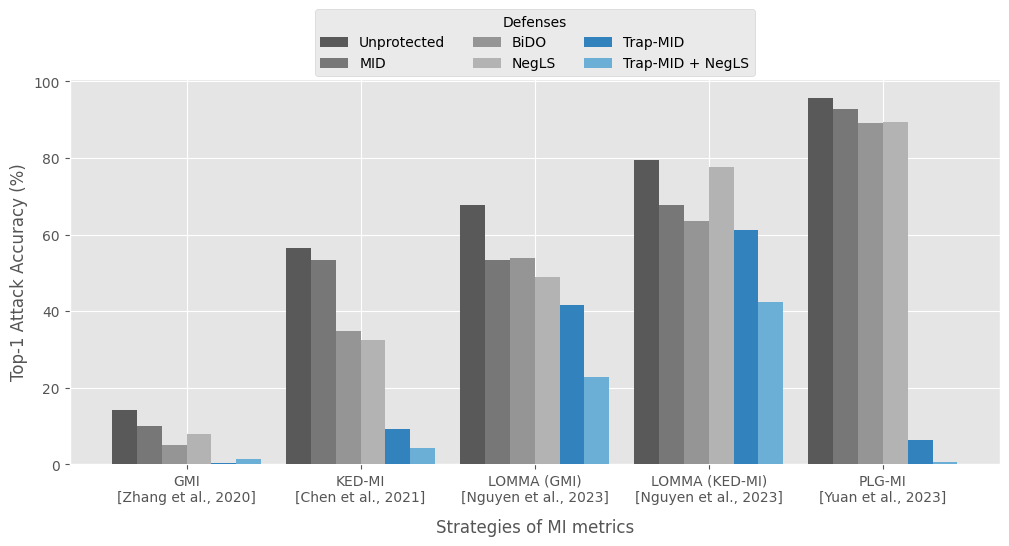

In [46]:
n = len(baselines) + len(ours)
presented_metrics = metrics[1:]
presented_metric_names = metric_names[1:]

offset = 0
width = 1 / (n+1)
x = np.arange(len(presented_metrics))
cmap = plt.get_cmap('tab20c')
plt.figure(figsize=(12, 5))
grayscales = np.linspace(0.35, 0.7, len(baselines))
for label, grayscale in zip(baselines, grayscales):
    plt.bar(x + offset, [avg_results[label][metric] for metric in presented_metrics], width, label=label, zorder=10, color=str(grayscale))
    offset += width

for i, label in enumerate(ours):
    plt.bar(x + offset, [avg_results[label][metric] for metric in presented_metrics], width, label=label, zorder=10, color=cmap.colors[i])
    offset += width

plt.ylabel('Top-1 Attack Accuracy (%)')
plt.xticks(x + width * (n - 1) / 2, presented_metric_names)
plt.xlabel('Strategies of MI metrics', labelpad=10)
plt.grid(zorder=1)
plt.legend(title='Defenses', ncols=3, loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()